In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('student-mat.csv')
df = pd.read_csv('student-mat.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

In [5]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
obj_cols = []
for column in df.columns.tolist():
    if df[column].dtype == 'object':
        obj_cols.append(column)

In [8]:
obj_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

<ipython-input-9-51c687ec8936>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


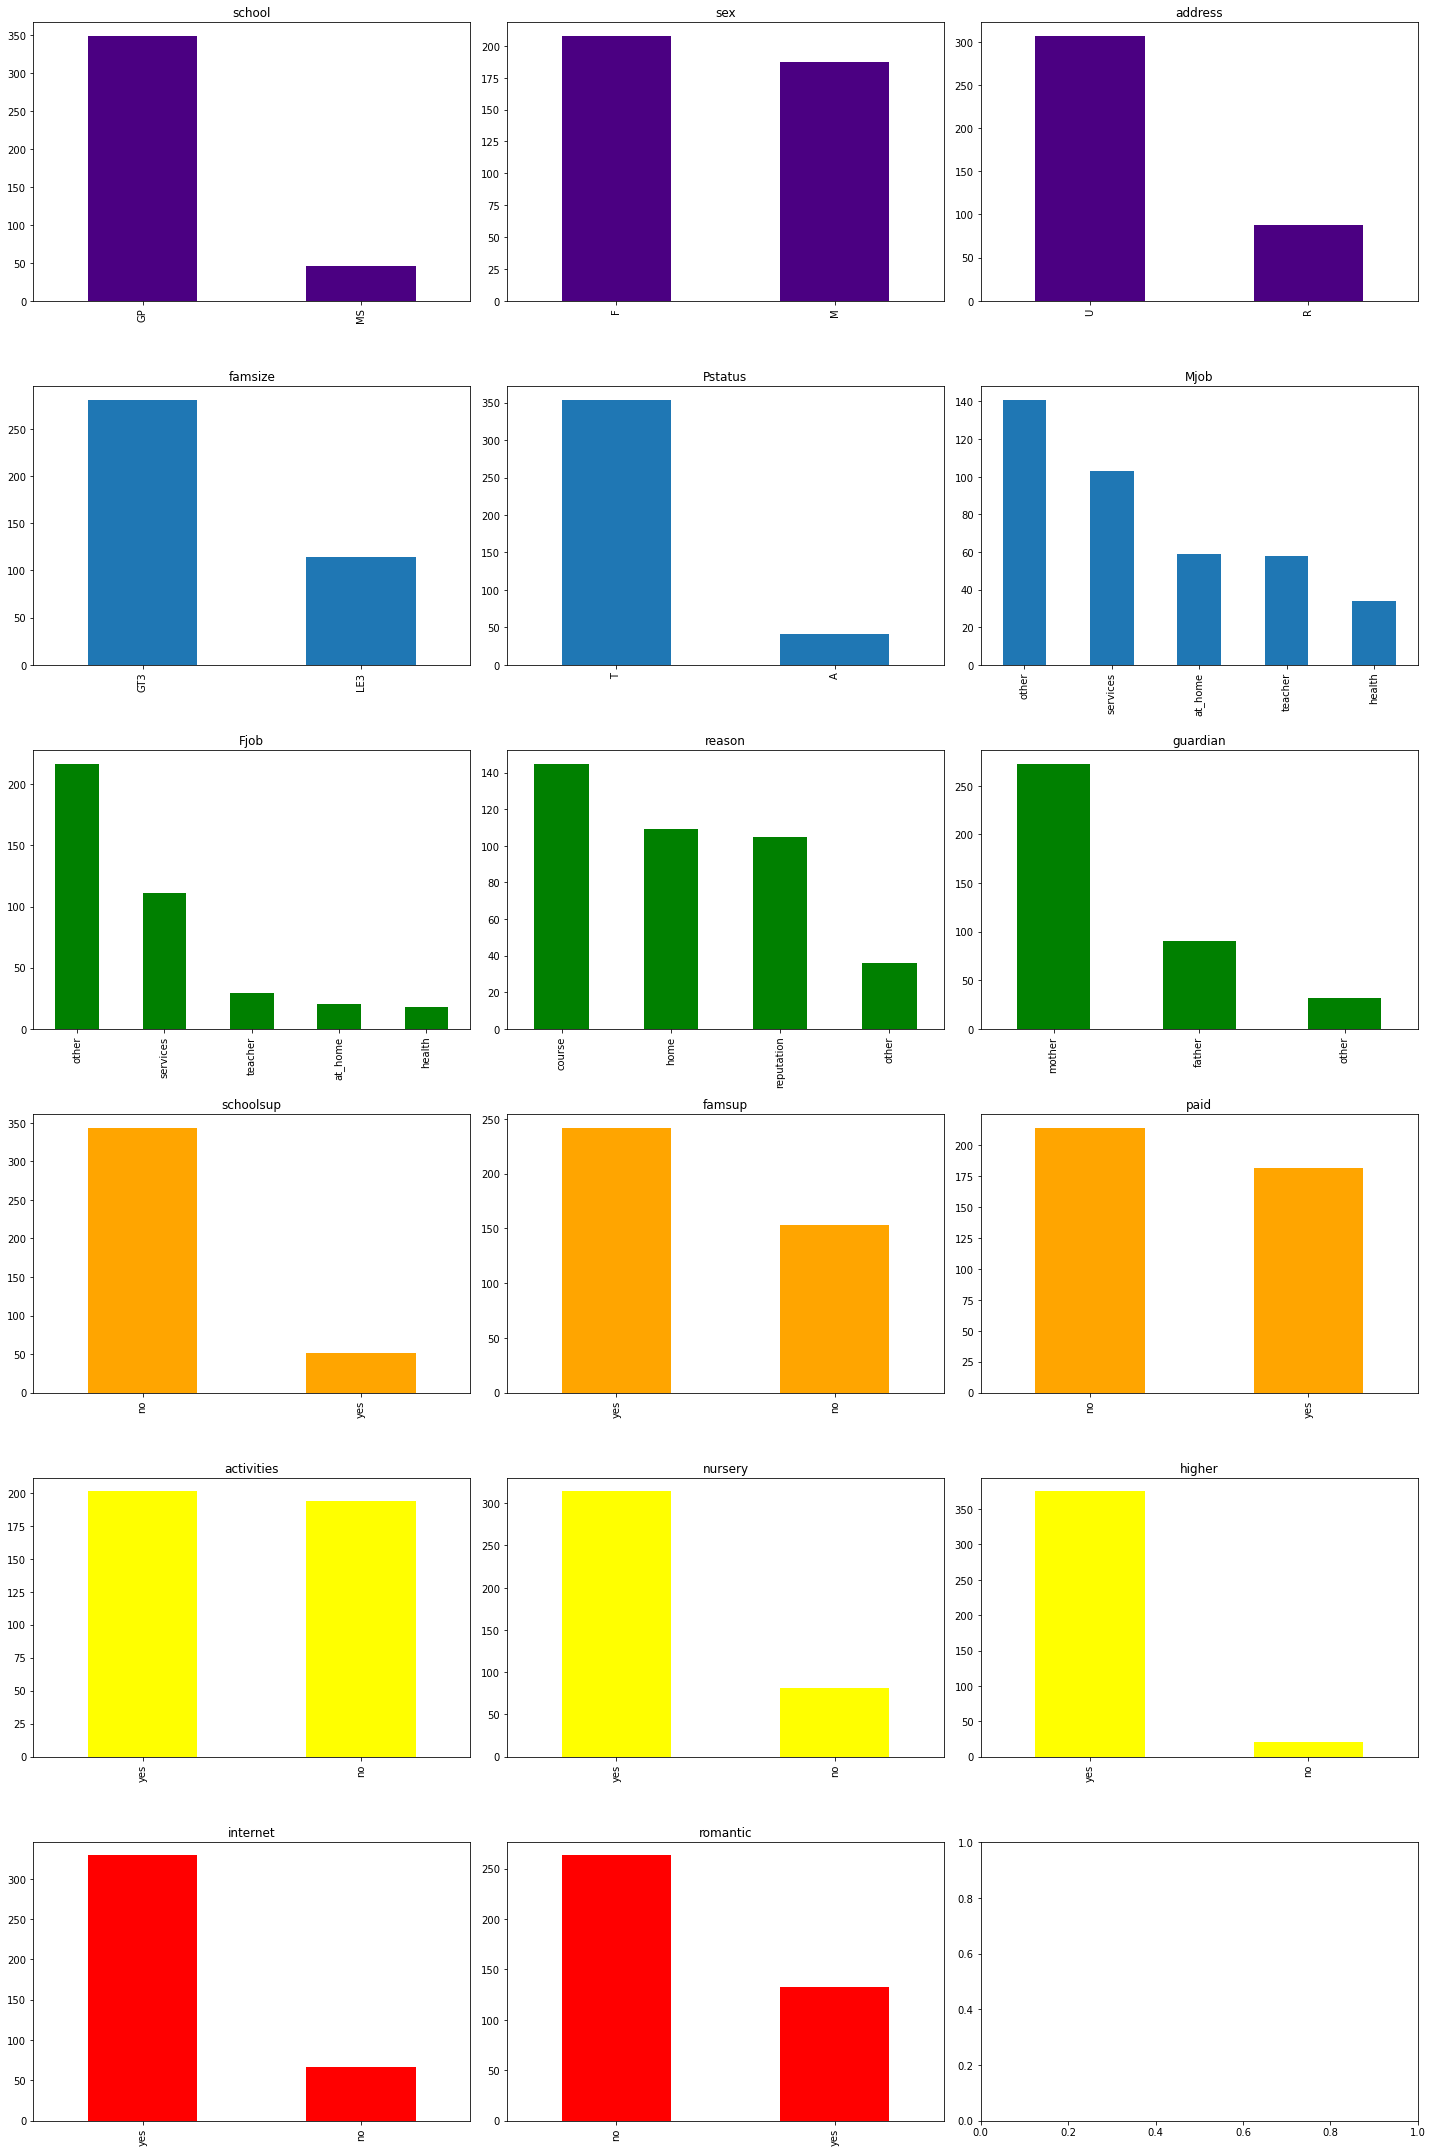

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 3, figsize = (20, 30), tight_layout = True)
for i, obj in enumerate(df[obj_cols]):
    if i < 3:
        df[obj].value_counts().plot(kind = "bar", ax = ax1[i], color = 'indigo').set_title(obj)
    elif i < 6:
        df[obj].value_counts().plot(kind = "bar", ax = ax2[i - 3]).set_title(obj)
    elif i < 9:
        df[obj].value_counts().plot(kind = "bar", ax = ax3[i - 6], color = "green").set_title(obj)
    elif i < 12:
        df[obj].value_counts().plot(kind = "bar", ax = ax4[i - 9], color = "orange").set_title(obj)
    elif i<15:
        df[obj].value_counts().plot(kind = "bar", ax = ax5[i - 12], color = "yellow").set_title(obj)
    else:
        df[obj].value_counts().plot(kind = "bar", ax = ax6[i - 15], color = "red").set_title(obj)
fig.show();

D:\Anaconda\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


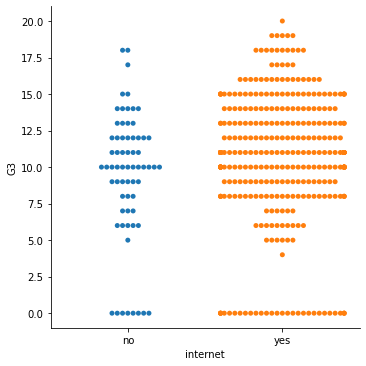

In [10]:
sns.catplot(x='internet',y='G3',data=df,kind='swarm')

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in obj_cols:
    data[col] = le.fit_transform(data[col])

In [12]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [13]:
data = data[data.G3 > 0]

In [14]:
data.shape

(357, 33)

<AxesSubplot:>

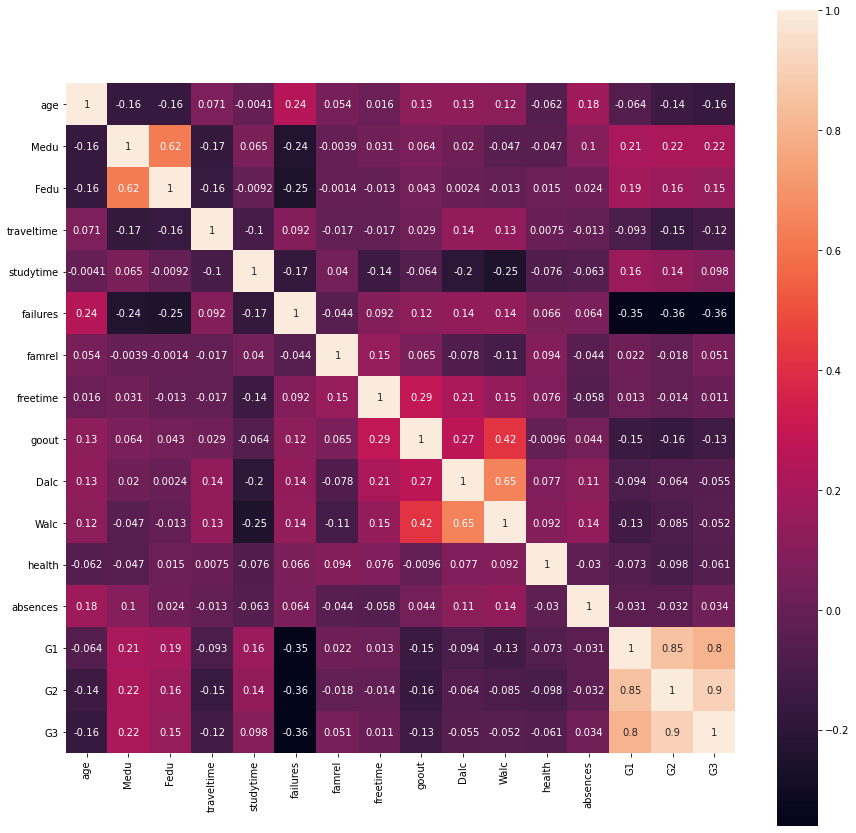

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square = True, annot = True)

In [16]:
remove = ['G1', 'G2', 'G3', 'failures']
data['Dalc'] += data['Walc']
feats = [col for col in df.columns if col not in remove]

x = data.loc[:, feats]
y = data.loc[:, 'G3']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [19]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [21]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
print('rmse: %.3f, mae: %.3f' % (rmse, mae))

rmse: 3.199, mae: 2.513


In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)

In [23]:
y_pred = model.predict(x_test)

In [24]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
print('rmse: %.3f, mae: %.3f' % (rmse, mae))

rmse: 3.561, mae: 2.933


In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train, y_train)

In [26]:
y_pred = model.predict(x_test)

In [27]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
print('rmse: %.3f, mae: %.3f' % (rmse, mae))

rmse: 2.961, mae: 2.371
